In [1]:
import pandas as pd 
from pymongo import MongoClient

In [2]:
df = pd.read_csv("/mnt/c/Users/yangg/project/data/comment/Machine Learnia/AFGvDndE2yc4mqKmTbAnHY.csv", index_col=0)

In [3]:
df.head()

,text,votes
0,C'est un nain de 10 pied 3m pas de 10m,0
1,Cool le t shirt y'en a pour les non puceaux,0
2,4:50 c pour sa que tu fait des musique maintenant,1
3,4:53 et dire qu'il a fait un album 4 ans après 👏💯,1
4,Regardez cette vidéo après la sortie de son al...,0


In [4]:
df = df.dropna(axis = 0)

In [31]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import unidecode
import re
stemmer = SnowballStemmer("french")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import stop_words
stw = stop_words.get_stop_words('fr')

In [33]:
def nettoyage(texte):
    tex=[]
    # Construction de la liste de stop words
    import stop_words
    sw_1=stop_words.get_stop_words('fr')
    
    sw_nltk = set(stopwords.words('french')) 
    sw=list(set(sw_1+list(sw_nltk)))+['vais','vous','je','les','qu','ils','ou','dont','tres',"etait"]
    sw=[unidecode.unidecode(elem) for elem in sw]
    
    texte=unidecode.unidecode(texte.lower())
    
    p="([a-z]+)"
    for elem in re.findall(p,texte):
        if elem in sw or elem==' ':
            continue
        else:
#             tex.append(stemmer.stem(elem))
            tex.append(elem)
    return ' '.join(tex)


In [35]:
df['text']=df['text'].apply(nettoyage)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

keys = vectorizer.get_feature_names()
array = X.toarray()

# data = pd.DataFrame(data=array, index=range(0, df.shape[0]), columns=keys)
# scaler = StandardScaler()
# Z = scaler.fit_transform(data)
# Z_df = pd.DataFrame(data=Z)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_10_most_common_words(count_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


/home/gautier/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayez', 'ayons', 'bon', 'car', 'ce', 'ceci', 'cela', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'ci', 'comme', 'comment', 'd', 'dans', 'de', 'dedans', 'dehors', 'depuis', 'des', 'deux', 'devoir', 'devrait', 'devrez', 'devriez', 'devrions', 'devrons', 'devront', 'dois', 'doit', 'donc', 'dos', 'droite', 'du', 'dès', 'début', 'dù', 'elle', 'elles', 'en', 'encore', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fais', 'faisez', 'fait', 'faites', 'fois', 'font', 'force', 'fu

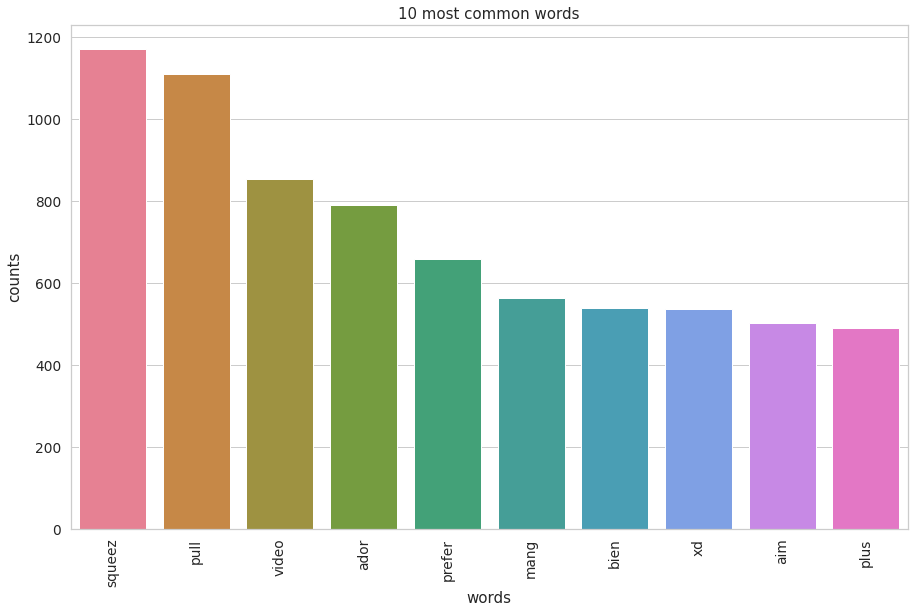

In [37]:
count_vectorizer = CountVectorizer(stw)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [13]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
blob1 = tb(u"c'est décroissant")
blob1.sentiment

(0.0, 0.0)

In [8]:
df2 = pd.read_csv("/mnt/c/Users/yangg/project/data/comment/Machine Learnia/AFGvDndE2yc.csv", index_col=0)

In [9]:
df2 = df2.dropna(axis = 0)

In [14]:
df2['polarity'] = df2['text'].apply(lambda x: tb(x).sentiment)

In [15]:
def which_sentiment(x):
    if x[0] > 0:
        return 'positive'
    elif x[0] < 0:
        return 'negative'
    else:
        return 'neutre'

In [23]:
df2['sentiment'] = df2['polarity'].apply(which_sentiment)

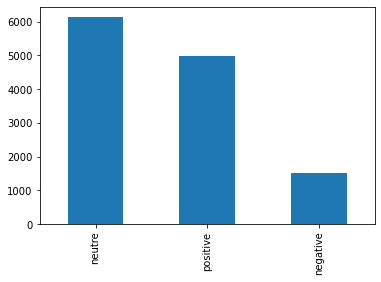

In [25]:
df2['sentiment'].value_counts().plot.bar()

In [51]:
client = MongoClient('localhost', 27017)
db = client.youtube
collection = db.comments

In [52]:
comments_in_db = collection.find({"video_id": "82KLS2C_gNQ"})
df =  pd.DataFrame(list(comments_in_db))

In [32]:
#  collection.insert_one({'video_id':123354,'comment_id':"dfdfg", 'text':"dssdgsqrg",'votes':454867867})

In [40]:
collection.drop()

In [53]:
df

,_id,video_id,comment_id,text,votes
0,5f82ca4c0b490e6996cf72a0,82KLS2C_gNQ,Ugxpybk5iDYyleVvHeh4AaABAg,Pensez vous qu'a la fin de vos vidéos je serai...,0
1,5f82ca4d0b490e6996cf72a1,82KLS2C_gNQ,UgwA-x2Toj_3iEWjzYZ4AaABAg,"En premier, un Gros merci pour le bon travail ...",0
2,5f82ca4d0b490e6996cf72a2,82KLS2C_gNQ,UgwA-x2Toj_3iEWjzYZ4AaABAg.9EWi-7FgV8l9EX2kMJAjtA,Bonjour et merci :)\nIl y a mon site internet ...,0
3,5f82ca4d0b490e6996cf72a3,82KLS2C_gNQ,UgzJpSgcHQkmx3gI-TB4AaABAg,Je m'abonne direct même pas besoin de le deman...,0
4,5f82ca4d0b490e6996cf72a4,82KLS2C_gNQ,UgzJpSgcHQkmx3gI-TB4AaABAg.9EVnGsEss0n9EVoqFEJjPf,Bienvenue dans la communauté :),0
...,...,...,...,...,...
567,5f82ca530b490e6996cf74d7,82KLS2C_gNQ,UgyprbZDgn65hNN-i8J4AaABAg,merci beaucoup Guillaume c'est super gentil et...,1
568,5f82ca530b490e6996cf74d8,82KLS2C_gNQ,UgyprbZDgn65hNN-i8J4AaABAg.8zQU_oQq5_f8zQVkXypgJ2,Merci beaucoup ! :),1
569,5f82ca530b490e6996cf74d9,82KLS2C_gNQ,UgyprbZDgn65hNN-i8J4AaABAg.8zQU_oQq5_f8zQW8eheiSV,je vous en prie cher Guillaume,1
570,5f82ca530b490e6996cf74da,82KLS2C_gNQ,Ugwqlkvcz1xTK6Bynt14AaABAg,Super ! J'ai hâte de voir les autres vidéos de...,0


In [43]:
client.close()

In [56]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from pymongo import MongoClient
import pandas as pd
import random


def sentiment_analysis(comments_data):
    '''
    This function take in mongodb all comments with the video_id that we give, and use nlp to give us the sentiment
    '''
    # import weights that trained with allocine dataset by Camember tokenizer
    tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
    model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")
    nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

    # Connection to Mongodb and read comments with video_id
    # client = MongoClient('localhost', 27017)
    # db = client.youtube
    # collection = db.comments
    # comments_mongo = collection.find({"video_id": video_id})

    random_df = comments_data['text'].sample(n=100, random_state=1)
    sentiments = [nlp(com)[0]['label'] for com in random_df]
    
    positive_nb = sentiments.count("POSITIVE")
    negative_nb = sentiments.count("NEGATIVE")
    # df_comments['sentiment'] = df_comments['text'].apply(lambda x: nlp(x)[0]['label'])
    # client.close()
    return positive_nb, negative_nb

In [57]:
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint weights were used when initializing TFCamembertForSequenceClassification.

All the weights of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [58]:
random_df = df['text'].sample(n=100, random_state=1)

In [59]:
sentiments = [nlp(com)[0]['label'] for com in random_df]

In [49]:
sentiment_analysis(df)

All model checkpoint weights were used when initializing TFCamembertForSequenceClassification.

All the weights of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


(92, 8)

In [3]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")

All model checkpoint weights were used when initializing TFCamembertForSequenceClassification.

All the weights of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [4]:
import pickle

In [5]:
pickle.dump( tokenizer, open( "tokenizer.pickle", "wb" ) )

In [6]:
pickle.dump( model, open( "model.pickle", "wb" ) )

TypeError: cannot pickle 'weakref' object

In [9]:
import dill

In [8]:
import weakref

In [11]:
dill.dumps(weakref.WeakKeyDictionary())

b'\x80\x04\x95\x9b\x01\x00\x00\x00\x00\x00\x00\x8c\x07weakref\x94\x8c\x11WeakKeyDictionary\x94\x93\x94)\x81\x94}\x94(\x8c\x04data\x94}\x94\x8c\x07_remove\x94\x8c\ndill._dill\x94\x8c\x10_create_function\x94\x93\x94(h\x08\x8c\x0c_create_code\x94\x93\x94(K\x02K\x00K\x00K\x03K\x03KSC.|\x01\x83\x00}\x02|\x02d\x00k\tr*|\x02j\x00r"|\x02j\x01\xa0\x02|\x00\xa1\x01\x01\x00n\x08|\x02j\x03|\x00=\x00d\x00S\x00\x94N\x85\x94(\x8c\n_iterating\x94\x8c\x11_pending_removals\x94\x8c\x06append\x94h\x05t\x94\x8c\x01k\x94\x8c\x07selfref\x94\x8c\x04self\x94\x87\x94\x8c0/home/gautier/anaconda3/lib/python3.8/weakref.py\x94\x8c\x06remove\x94MY\x01C\n\x00\x01\x06\x01\x08\x01\x06\x01\x0e\x02\x94))t\x94R\x94cweakref\n__dict__\nh\x18h\x08\x8c\x0f_create_weakref\x94\x93\x94h\x03\x85\x94R\x94\x85\x94N}\x94Nt\x94R\x94h\x10]\x94h\x0f\x8f\x94\x8c\n_dirty_len\x94\x89ub.'